In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_score, recall_score, f1_score,
                             matthews_corrcoef)
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Função metrica de avaliação

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve
)

def calcular_metricas_e_plotar(y_test, y_pred, y_pred_proba):
    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Calcular métricas adicionais
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.title('Matriz de Confusão')
    plt.show()

    # Exibir as métricas calculadas
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Precisão (Precision): {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

    # Calcular e plotar a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Criando um DataFrame com as probabilidades e o target
    results = pd.DataFrame({
        'target': y_test,
        'probabilidade': y_pred_proba
    })

    # Ordenar os dados por probabilidade decrescente
    results = results.sort_values(by='probabilidade', ascending=False)

    # Definindo os quantis para dividir os dados
    quantis = np.linspace(0.1, 1.0, 10)

    # Calculando o lift em cada quantil
    lift_values = []
    baseline = results['target'].mean()  # Média da classe positiva no total
    for q in quantis:
        # Pegando os dados até o quantil q
        cutoff = int(q * len(results))
        subset = results.iloc[:cutoff]

        # Calculando o lift
        lift = subset['target'].mean() / baseline
        lift_values.append(lift)

    # Plotando a curva de lift
    plt.plot(quantis, lift_values, marker='o')
    plt.title('Curva de Lift')
    plt.xlabel('Percentil')
    plt.ylabel('Lift')
    plt.grid(True)
    plt.show()

In [4]:

# Carregar as bases de dados
xy_train = joblib.load('/content/drive/MyDrive/xy_train.joblib')
xy_test = joblib.load('/content/drive/MyDrive/xy_test.joblib')

In [5]:
xy_train.keys()

dict_keys(['2011_2014', '2011_2015', '2011_2016', '2011_2017', '2011_2018', '2011_2019', '2011_2020', '2011_2021', '2011_2022', '2011_2023'])

In [6]:
xy_test.keys()

dict_keys(['2011_2014', '2011_2015', '2011_2016', '2011_2017', '2011_2018', '2011_2019', '2011_2020', '2011_2021', '2011_2022', '2011_2023'])

In [7]:
# Get train data
data = xy_train['2011_2014']
# Separate features and target
X_train = data.drop(columns=['y'])
y_train = data['y']

In [8]:
# Get test data
data_test = xy_test["2011_2014"]
# Separate features and target
X_test = data_test.drop(columns=['y'])
y_test = data_test['y']

In [10]:
X_test.shape, y_test.shape

((50094, 166), (50094,))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


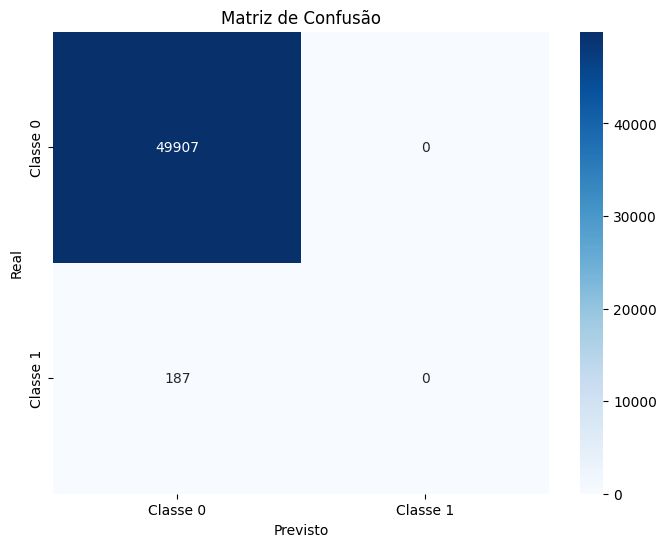

AUC-ROC: 0.64
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


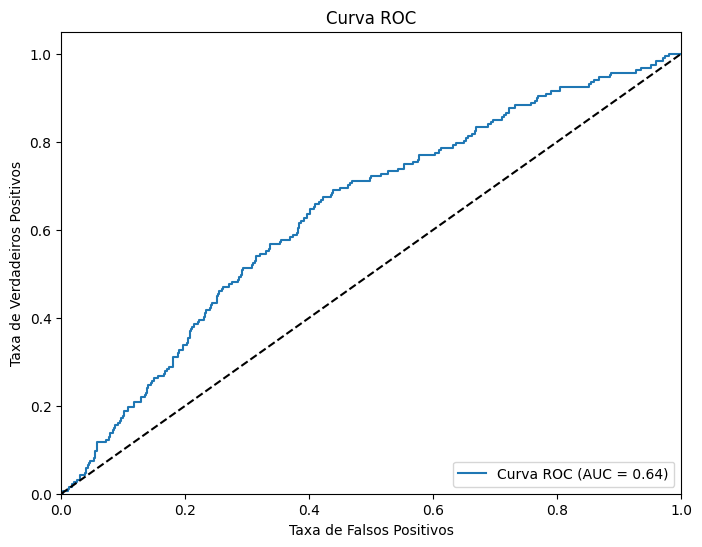

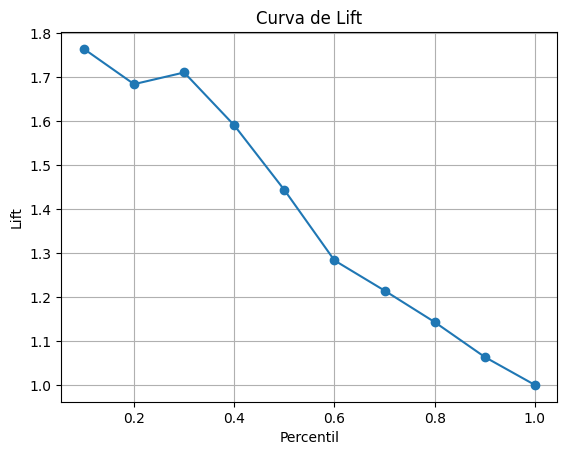

In [11]:
# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

calcular_metricas_e_plotar(y_test, y_pred, y_pred_proba)

Testar depois pra todos os modelos, não tive memoria para rodar

Modelo RandomForest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


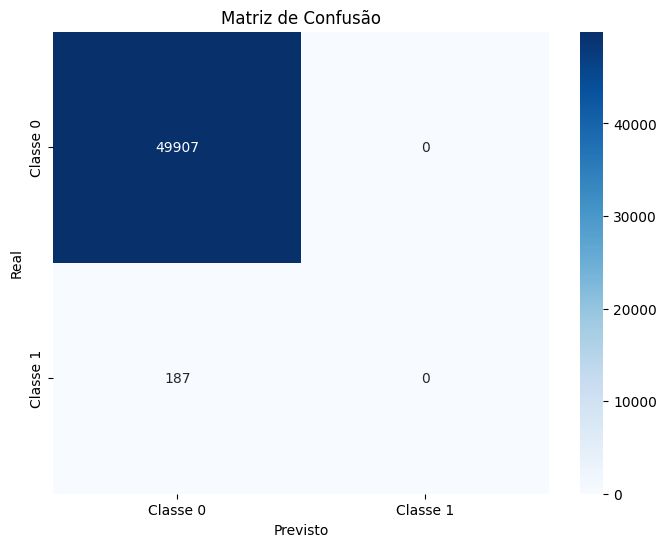

AUC-ROC: 0.66
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


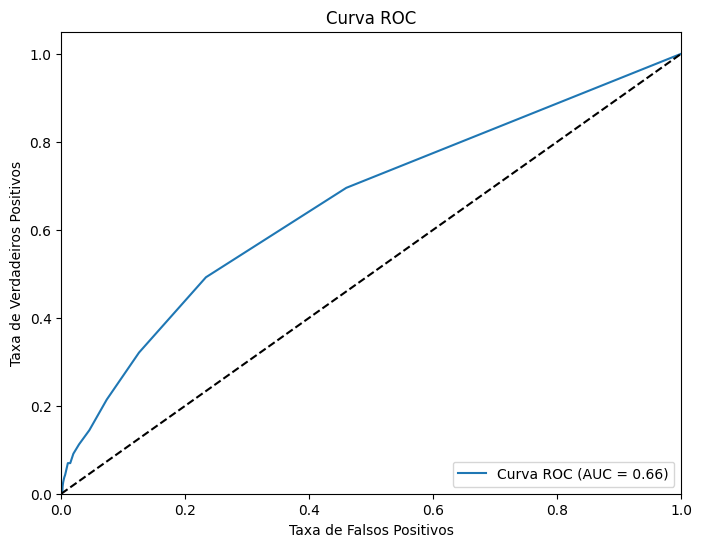

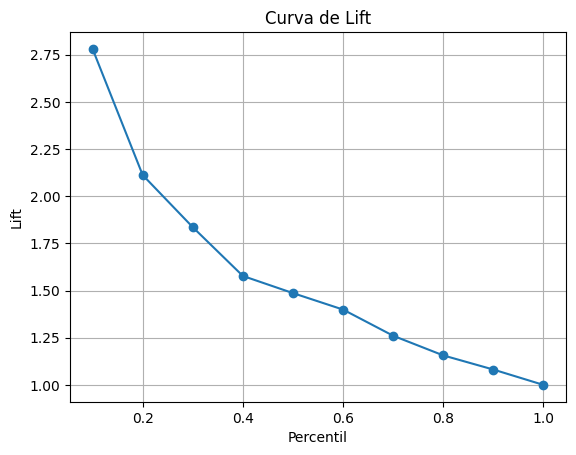

In [12]:
# Treinar um modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

calcular_metricas_e_plotar(y_test, y_pred, y_pred_proba)

**Multi Layer Perceptron**

In [13]:
threshold = 0.5

In [14]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          21,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,017 (148.50 KB)

 Trainable params: 38,017 (148.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=1
)


Epoch 1/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - auc: 0.5898 - loss: 0.0352 - val_auc: 0.6278 - val_loss: 0.0154
Epoch 2/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc: 0.7145 - loss: 0.0091 - val_auc: 0.5737 - val_loss: 0.0171
Epoch 3/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - auc: 0.7575 - loss: 0.0089 - val_auc: 0.6212 - val_loss: 0.0169
Epoch 4/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - auc: 0.8101 - loss: 0.0080 - val_auc: 0.5933 - val_loss: 0.0200
Epoch 5/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc: 0.8578 - loss: 0.0070 - val_auc: 0.5951 - val_loss: 0.0190
Epoch 6/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - auc: 0.8769 - loss: 0.0074 - val_auc: 0.5589 - val_loss: 0.0214
Epoch 7/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc: 0.9123 - loss: 0.0060 - val_auc: 0.6002 - val_loss: 0.0198
Epoch 8/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - auc: 0.9245 - loss: 0.0056 - val_auc: 0.6004 - val_loss: 0.0210
Epoch 9/10
1195/1195 ━━━━━━━━━━━━━━━━━━━

In [17]:
y_pred = model.predict(X_test)


1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [18]:
#Função metrica de avaliação para MLP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve
)

def calcular_metricas_e_plotar_MLP(y_test, y_pred):
    # Calcular a matriz de confusão
    #y_pred = np.where(y_pred>=threshold, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)

    # Calcular métricas adicionais
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.title('Matriz de Confusão')
    plt.show()

    # Exibir as métricas calculadas
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Precisão (Precision): {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

    # Calcular e plotar a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Criando um DataFrame com as probabilidades e o target
    y_pred = y_pred.reshape(-1) # Flatten y_pred to a 1D array
    results = pd.DataFrame({
        'target': y_test,
        'probabilidade': y_pred
    })

    # Ordenar os dados por probabilidade decrescente
    results = results.sort_values(by='probabilidade', ascending=False)

    # Definindo os quantis para dividir os dados
    quantis = np.linspace(0.1, 1.0, 10)

    # Calculando o lift em cada quantil
    lift_values = []
    baseline = results['target'].mean()  # Média da classe positiva no total
    for q in quantis:
        # Pegando os dados até o quantil q
        cutoff = int(q * len(results))
        subset = results.iloc[:cutoff]

        # Calculando o lift
        lift = subset['target'].mean() / baseline
        lift_values.append(lift)

    # Plotando a curva de lift
    plt.plot(quantis, lift_values, marker='o')
    plt.title('Curva de Lift')
    plt.xlabel('Percentil')
    plt.ylabel('Lift')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


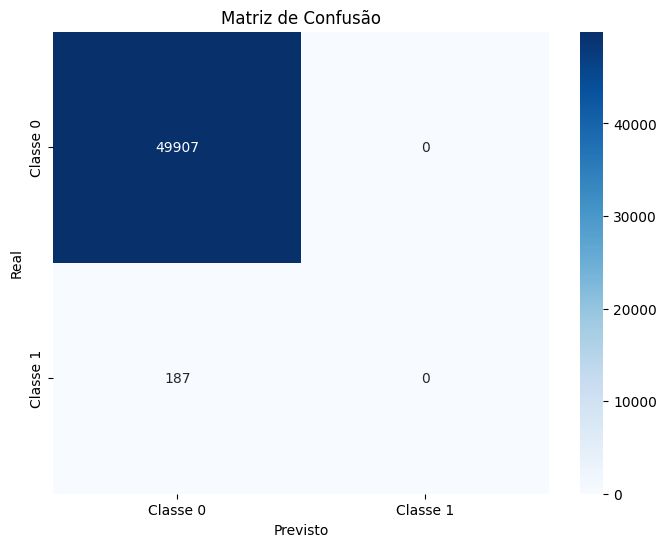

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


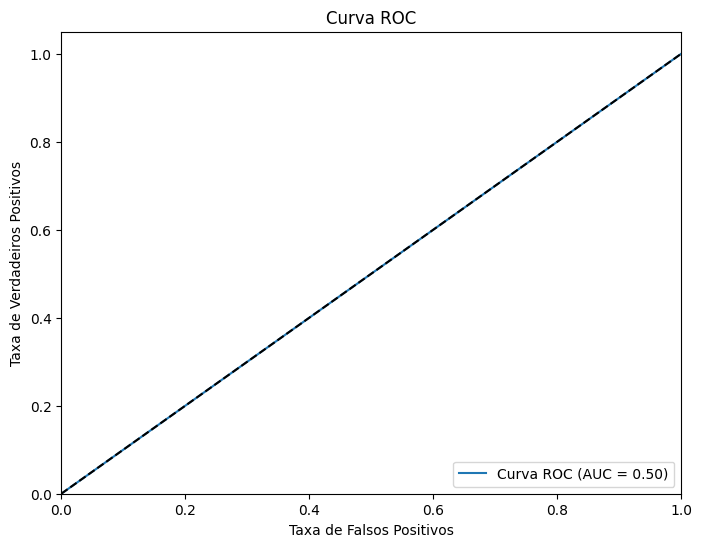

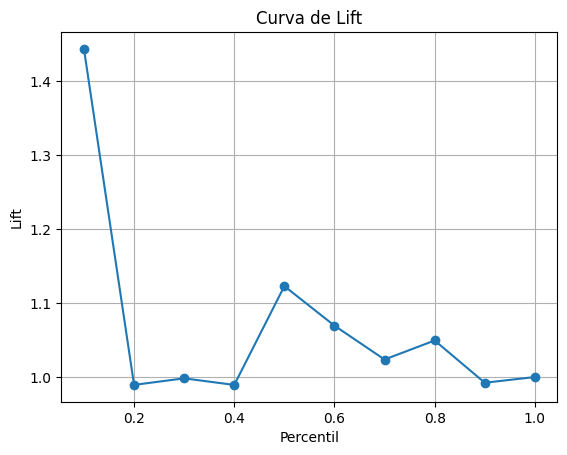

In [19]:
y_pred_binary = (y_pred > 0.5).astype(int)
calcular_metricas_e_plotar_MLP(y_test, y_pred_binary)

MLP com fine tunning


Training for key 2011_2014...

Epoch 1/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - auc_1: 0.6083 - loss: 0.0354 - val_auc_1: 0.5967 - val_loss: 0.0162
Epoch 2/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - auc_1: 0.7626 - loss: 0.0092 - val_auc_1: 0.5680 - val_loss: 0.0171
Epoch 3/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - auc_1: 0.7947 - loss: 0.0089 - val_auc_1: 0.6709 - val_loss: 0.0159
Epoch 4/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc_1: 0.8242 - loss: 0.0077 - val_auc_1: 0.6675 - val_loss: 0.0162
Epoch 5/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - auc_1: 0.8759 - loss: 0.0078 - val_auc_1: 0.5295 - val_loss: 0.0213
Epoch 6/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - auc_1: 0.9111 - loss: 0.0067 - val_auc_1: 0.5980 - val_loss: 0.0192
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


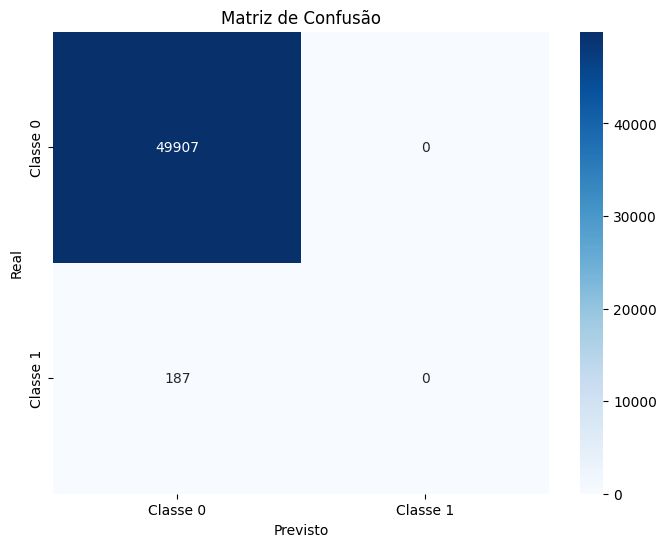

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


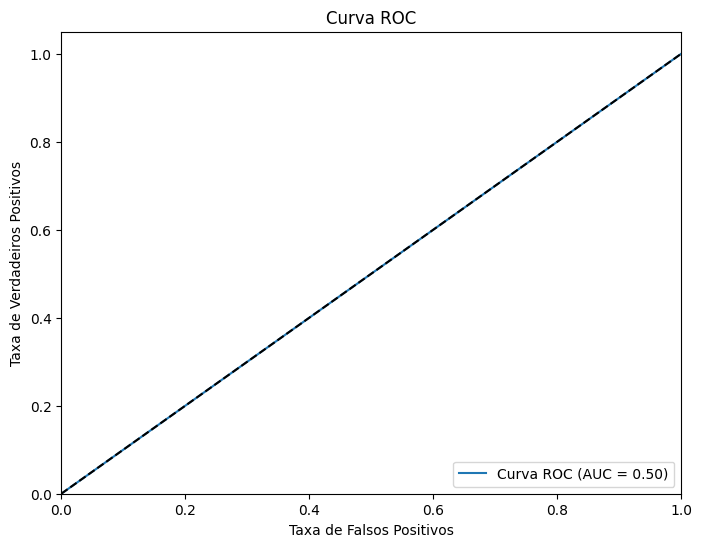

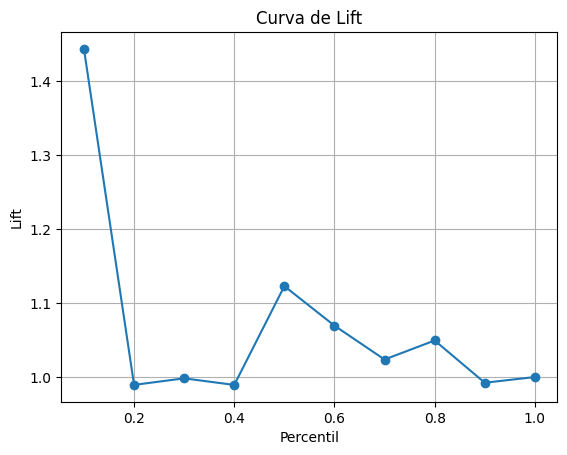


Training for key 2011_2015...

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_2: 0.5492 - loss: 0.0940 - val_auc_2: 0.5348 - val_loss: 0.0278
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc_2: 0.6887 - loss: 0.0229 - val_auc_2: 0.5744 - val_loss: 0.0270
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - auc_2: 0.7921 - loss: 0.0189 - val_auc_2: 0.6127 - val_loss: 0.0287
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - auc_2: 0.8664 - loss: 0.0193 - val_auc_2: 0.6080 - val_loss: 0.0275
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_2: 0.8509 - loss: 0.0176 - val_auc_2: 0.6096 - val_loss: 0.0274
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


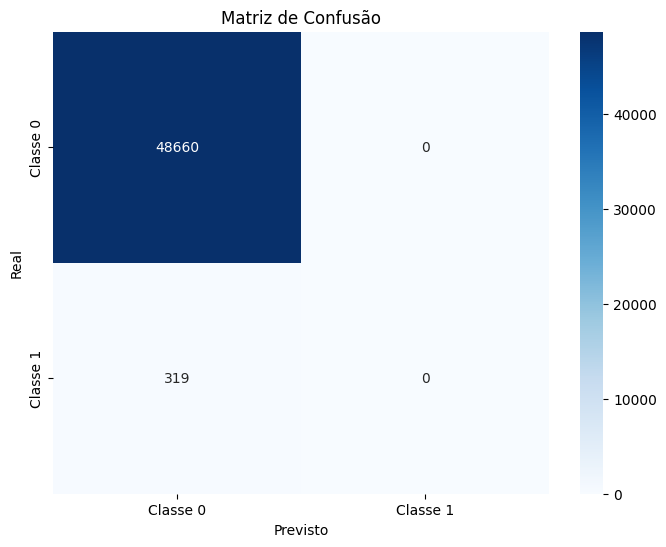

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


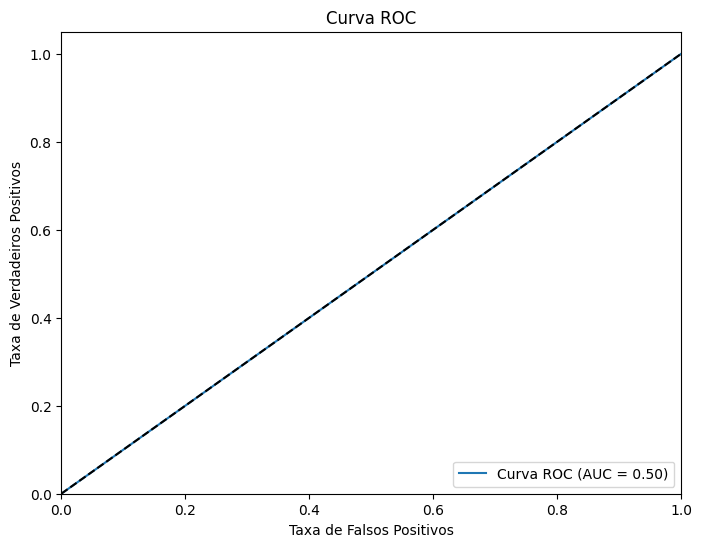

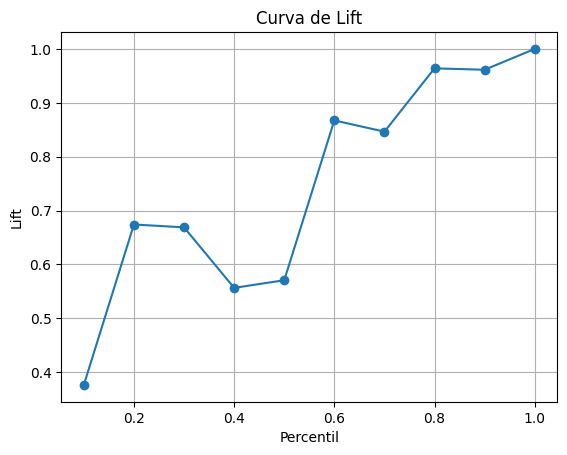


Training for key 2011_2016...

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc_3: 0.5540 - loss: 0.1250 - val_auc_3: 0.5806 - val_loss: 0.0216
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_3: 0.7731 - loss: 0.0428 - val_auc_3: 0.5643 - val_loss: 0.0217
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - auc_3: 0.8398 - loss: 0.0357 - val_auc_3: 0.6054 - val_loss: 0.0210
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - auc_3: 0.8781 - loss: 0.0343 - val_auc_3: 0.6018 - val_loss: 0.0211
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc_3: 0.8814 - loss: 0.0304 - val_auc_3: 0.5965 - val_loss: 0.0218
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_3: 0.9052 - loss: 0.0310 - val_auc_3: 0.5269 - val_loss: 0.0231
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


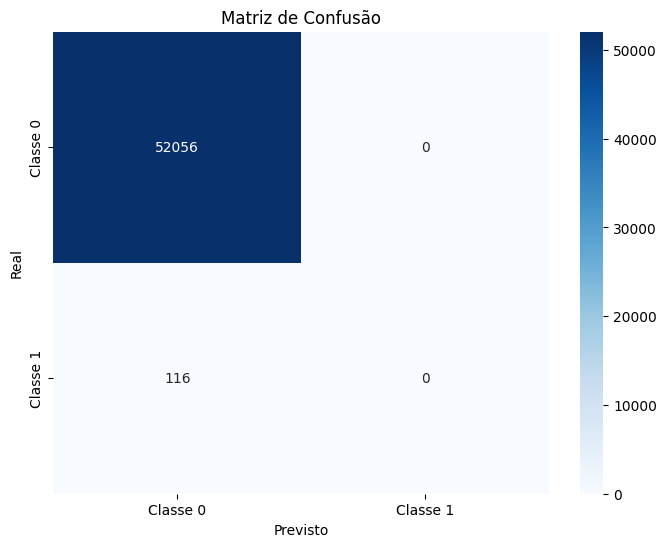

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


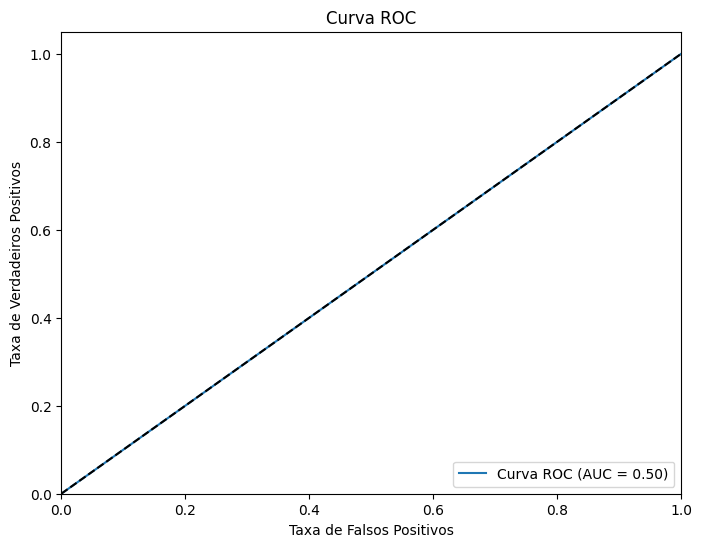

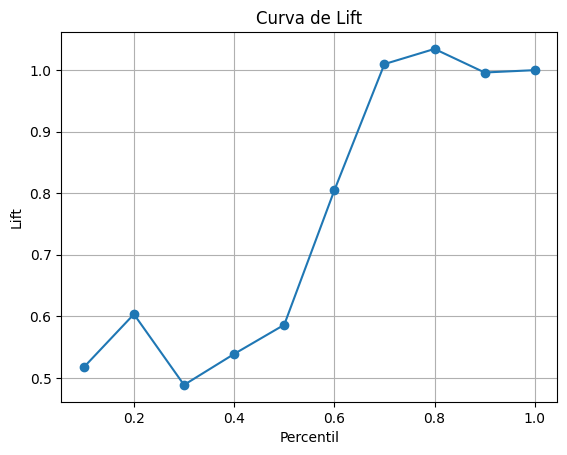


Training for key 2011_2017...

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_4: 0.4550 - loss: 0.0830 - val_auc_4: 0.5167 - val_loss: 0.0120
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_4: 0.7520 - loss: 0.0151 - val_auc_4: 0.5594 - val_loss: 0.0129
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc_4: 0.7838 - loss: 0.0130 - val_auc_4: 0.4426 - val_loss: 0.0131
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_4: 0.8042 - loss: 0.0132 - val_auc_4: 0.4608 - val_loss: 0.0139
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


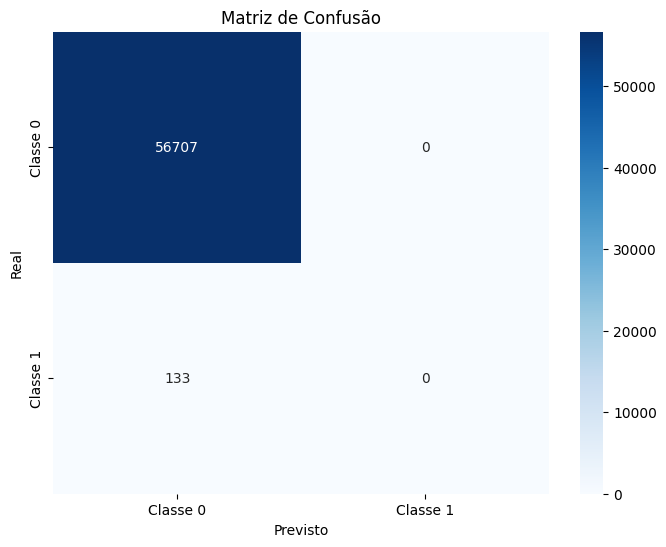

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


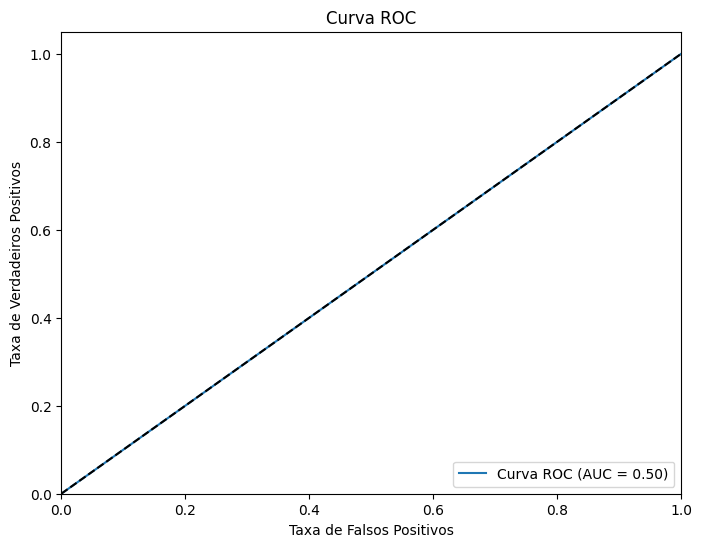

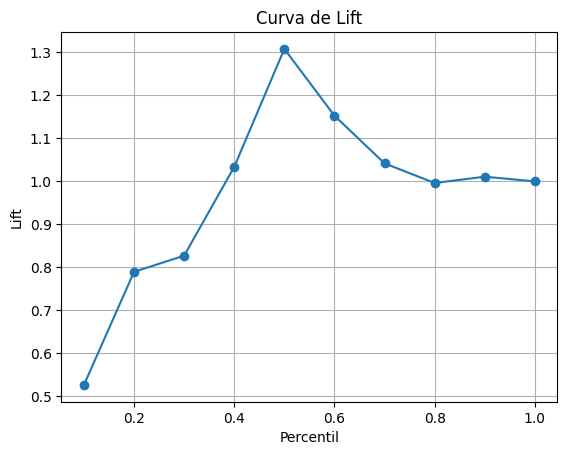


Training for key 2011_2018...

Epoch 1/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_5: 0.5282 - loss: 0.0804 - val_auc_5: 0.6047 - val_loss: 0.0200
Epoch 2/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_5: 0.6468 - loss: 0.0144 - val_auc_5: 0.5130 - val_loss: 0.0207
Epoch 3/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_5: 0.7361 - loss: 0.0140 - val_auc_5: 0.6169 - val_loss: 0.0206
Epoch 4/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_5: 0.7876 - loss: 0.0119 - val_auc_5: 0.5701 - val_loss: 0.0212
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


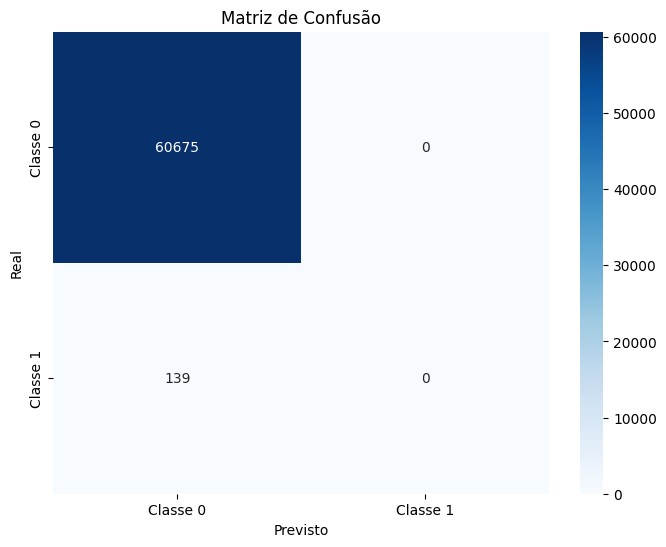

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


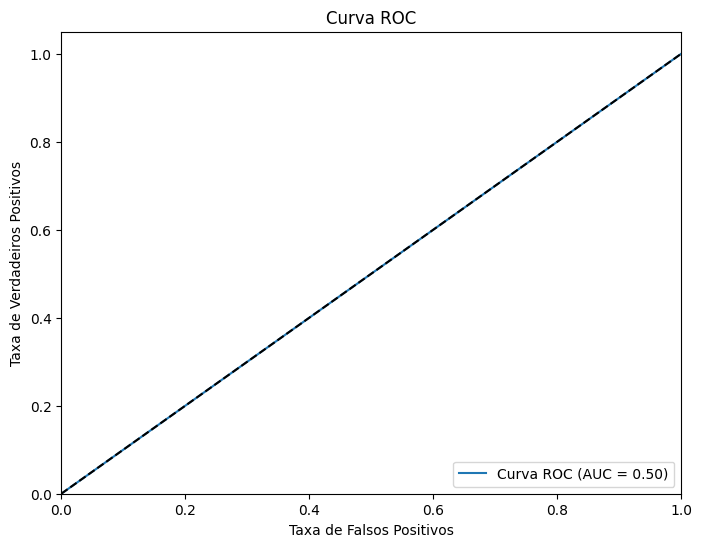

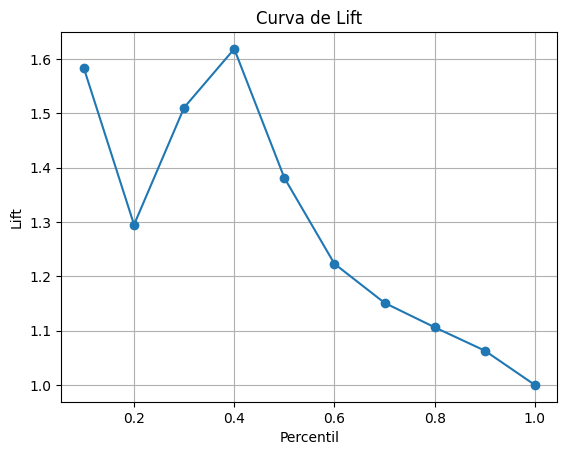


Training for key 2011_2019...

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc_6: 0.4792 - loss: 0.0645 - val_auc_6: 0.4990 - val_loss: 0.0245
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_6: 0.6625 - loss: 0.0122 - val_auc_6: 0.6088 - val_loss: 0.0241
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - auc_6: 0.8100 - loss: 0.0107 - val_auc_6: 0.5447 - val_loss: 0.0251
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_6: 0.8932 - loss: 0.0122 - val_auc_6: 0.4915 - val_loss: 0.0324
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc_6: 0.8479 - loss: 0.0077 - val_auc_6: 0.5252 - val_loss: 0.0275
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


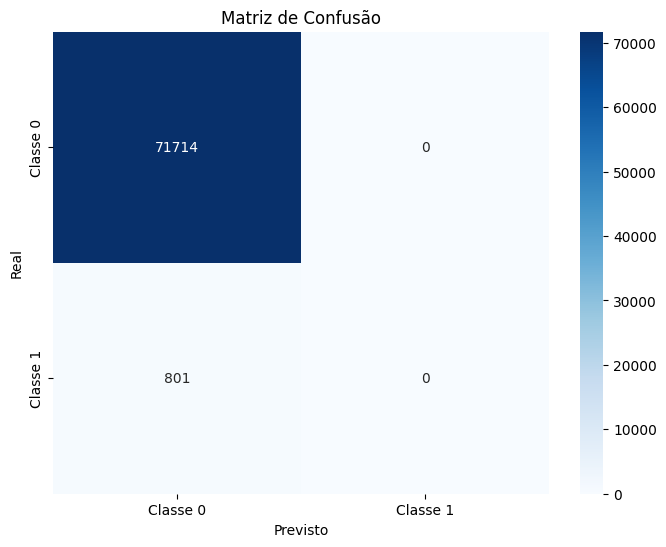

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


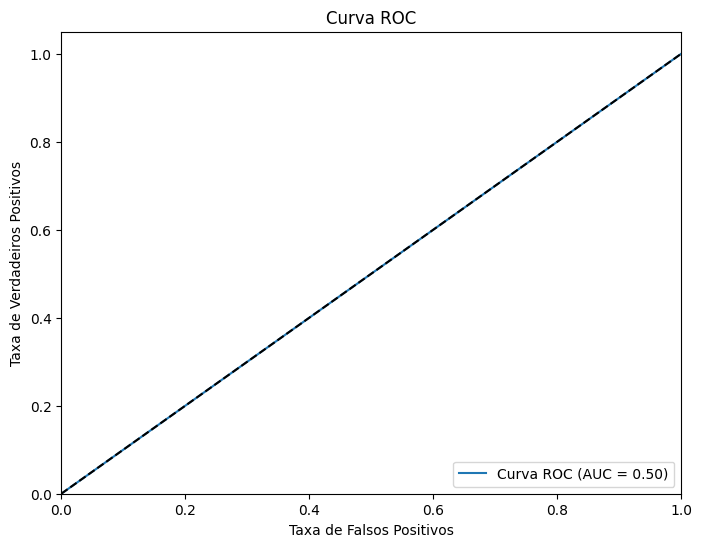

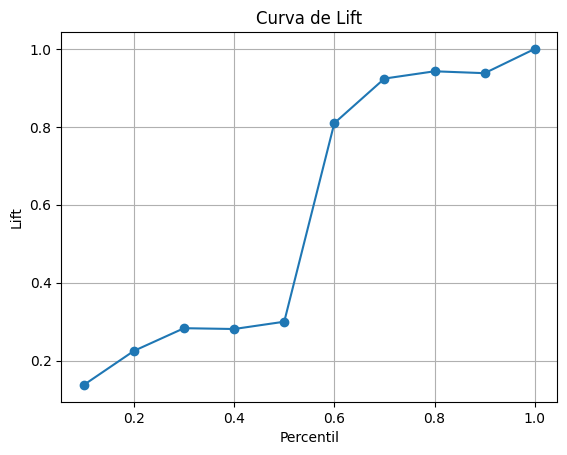


Training for key 2011_2020...

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_7: 0.6519 - loss: 0.0934 - val_auc_7: 0.6840 - val_loss: 0.0269
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_7: 0.8598 - loss: 0.0531 - val_auc_7: 0.6777 - val_loss: 0.0267
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - auc_7: 0.8731 - loss: 0.0519 - val_auc_7: 0.6533 - val_loss: 0.0266
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - auc_7: 0.8853 - loss: 0.0509 - val_auc_7: 0.6270 - val_loss: 0.0274
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_7: 0.9095 - loss: 0.0466 - val_auc_7: 0.6244 - val_loss: 0.0286
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc_7: 0.9252 - loss: 0.0432 - val_auc_7: 0.6370 - val_loss: 0.0285
2883/2883 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


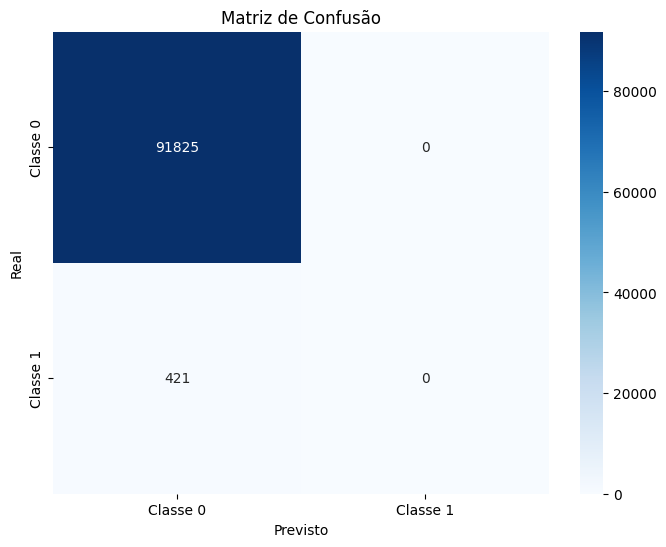

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


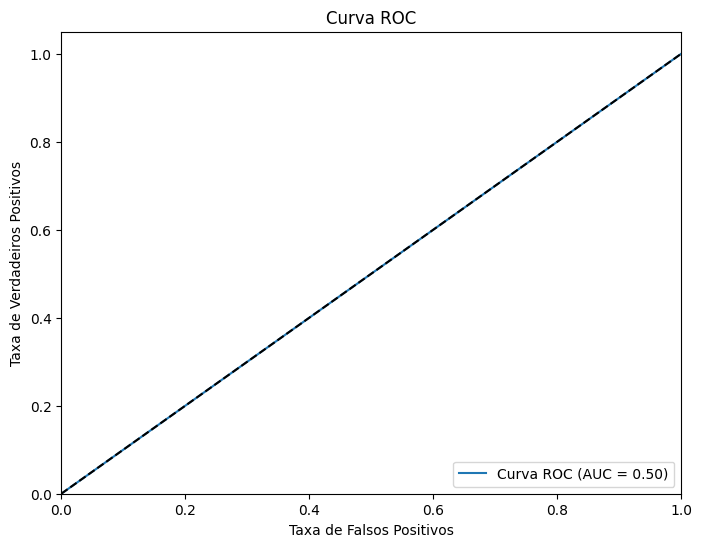

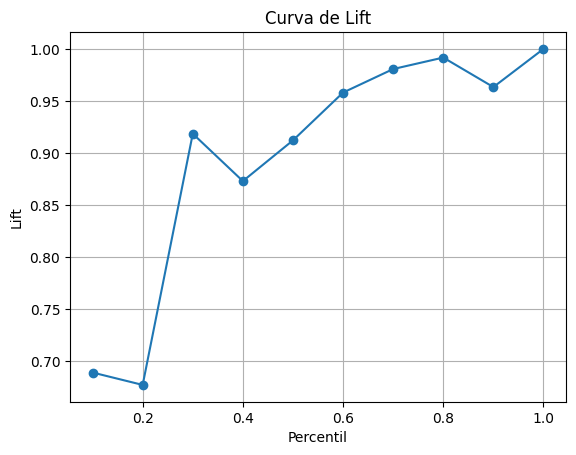


Training for key 2011_2021...

Epoch 1/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_8: 0.5580 - loss: 0.0722 - val_auc_8: 0.5611 - val_loss: 0.0334
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_8: 0.7709 - loss: 0.0227 - val_auc_8: 0.5575 - val_loss: 0.0349
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc_8: 0.8256 - loss: 0.0244 - val_auc_8: 0.6034 - val_loss: 0.0342
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc_8: 0.8506 - loss: 0.0227 - val_auc_8: 0.5414 - val_loss: 0.0373
3232/3232 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


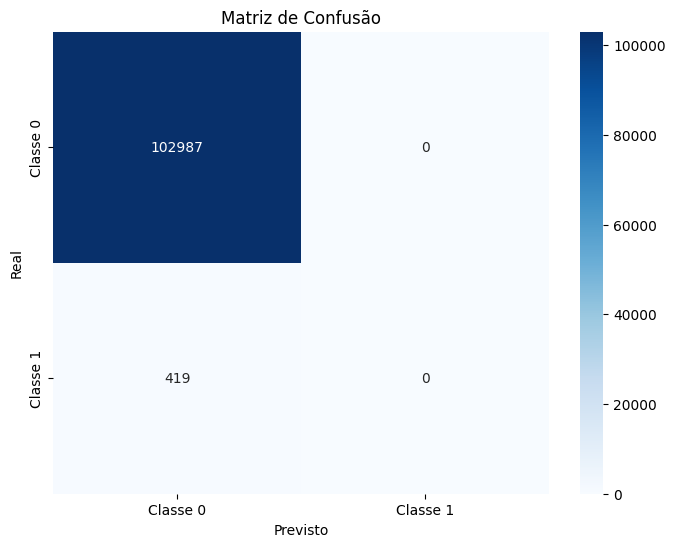

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


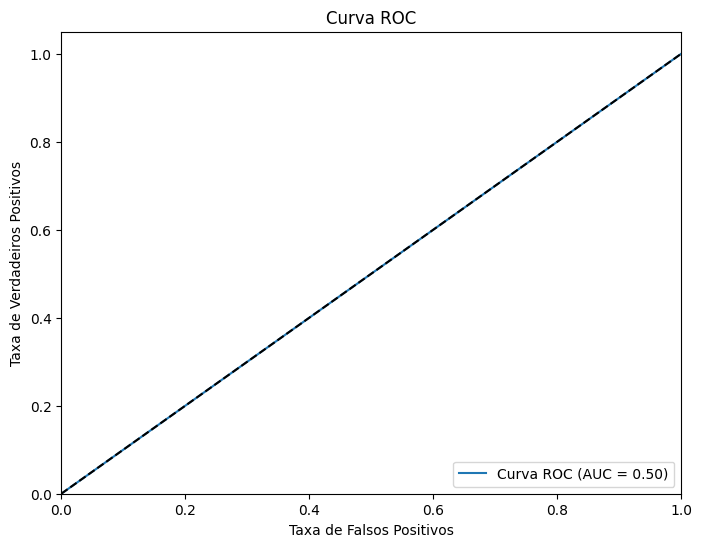

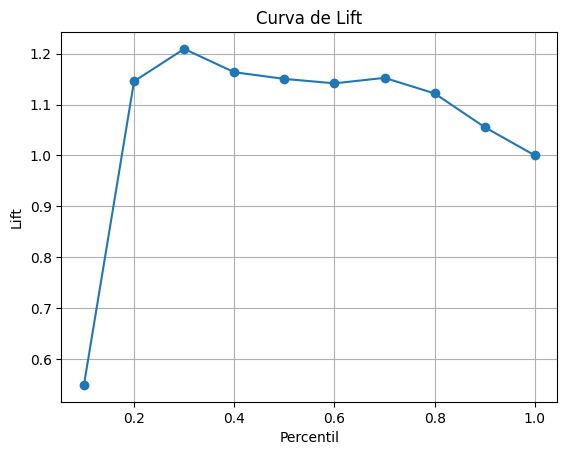


Training for key 2011_2022...

Epoch 1/10
647/647 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - auc_9: 0.5095 - loss: 0.0635 - val_auc_9: 0.6082 - val_loss: 0.0258
Epoch 2/10
647/647 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - auc_9: 0.6626 - loss: 0.0236 - val_auc_9: 0.6147 - val_loss: 0.0256
Epoch 3/10
647/647 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - auc_9: 0.7763 - loss: 0.0258 - val_auc_9: 0.5952 - val_loss: 0.0262
Epoch 4/10
647/647 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_9: 0.7774 - loss: 0.0222 - val_auc_9: 0.5662 - val_loss: 0.0272
Epoch 5/10
647/647 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - auc_9: 0.8196 - loss: 0.0223 - val_auc_9: 0.5321 - val_loss: 0.0282
2928/2928 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


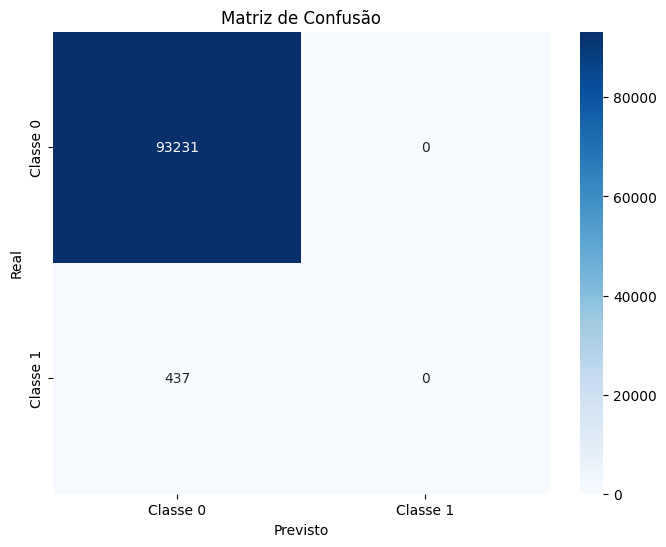

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


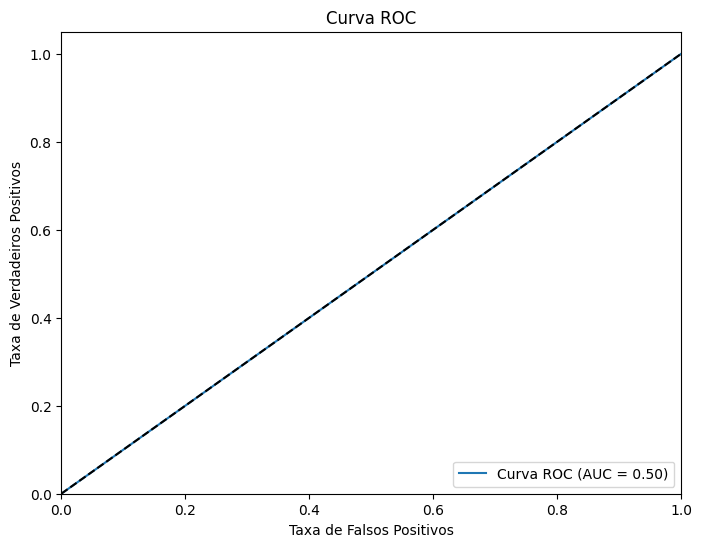

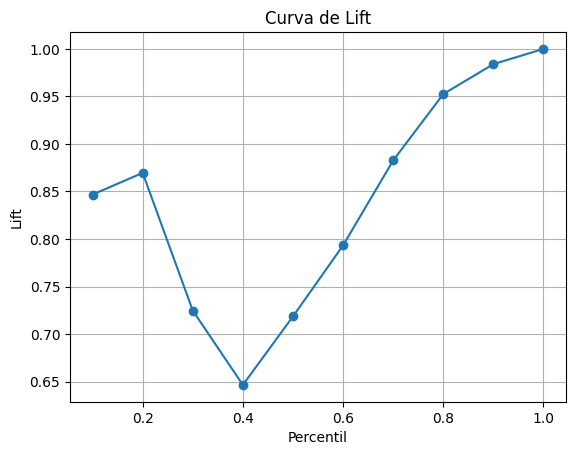


Training for key 2011_2023...

Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_10: 0.5616 - loss: 0.0615 - val_auc_10: 0.6313 - val_loss: 0.0241
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - auc_10: 0.7353 - loss: 0.0270 - val_auc_10: 0.6599 - val_loss: 0.0231
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - auc_10: 0.7842 - loss: 0.0283 - val_auc_10: 0.6120 - val_loss: 0.0238
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_10: 0.8304 - loss: 0.0267 - val_auc_10: 0.5826 - val_loss: 0.0243
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_10: 0.8324 - loss: 0.0231 - val_auc_10: 0.6262 - val_loss: 0.0245
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


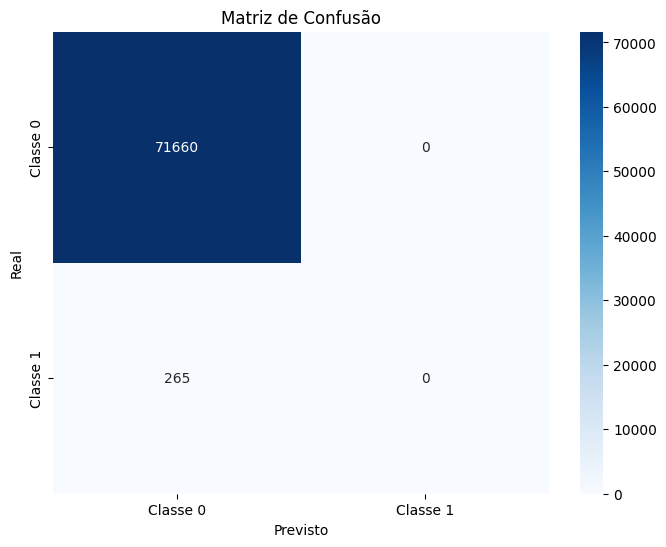

AUC-ROC: 0.50
Precisão (Precision): 0.00
Recall: 0.00
F1-Score: 0.00
Matthews Correlation Coefficient (MCC): 0.00


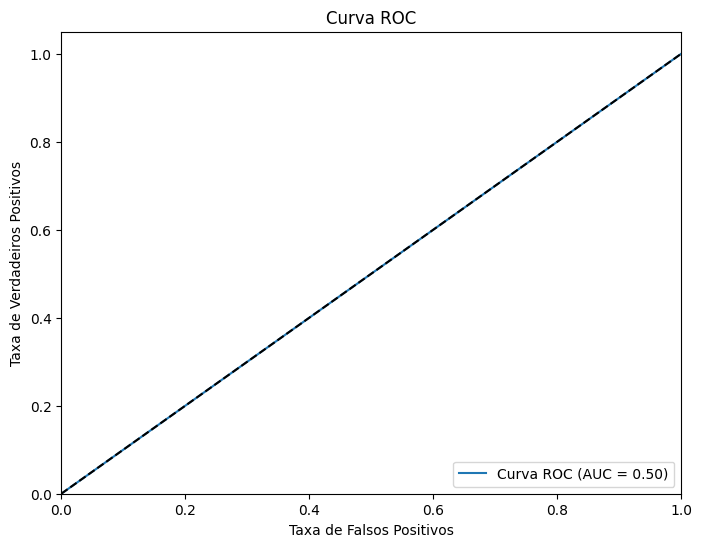

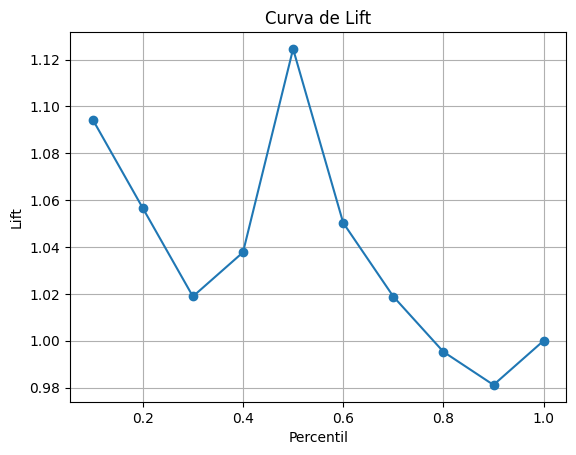

In [20]:
used_indices = set()
previous_model = None
metrics = pd.DataFrame(columns=["key", "precision", "recall", "f1", "pr-auc"])
threshold = 0.5

# Ensure keys are processed in order
for idx, key in enumerate(sorted(xy_train.keys())):
    print("="*120)
    print()
    print(f"Training for key {key}...")
    print()
    df = xy_train[key]
    df_test = xy_test[key]

    # Separate features and target
    X_train = df.drop(columns=['y'])
    y_train = df['y']
    X_test = df_test.drop(columns=['y'])
    y_test = df_test['y']

    # Get new indices not used in previous training
    new_indices = df.index.difference(used_indices)
    used_indices.update(df.index)

    x_new = X_train.loc[new_indices]
    y_new = y_train.loc[new_indices]

    # EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Re-initialize the model in each iteration
    model = Sequential() # Create a new Sequential model
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

    # Train the model with early stopping
    model.fit(
        x_new,
        y_new,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    # evaluate and save metrics
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > threshold).astype(int)
    calcular_metricas_e_plotar_MLP(y_test, y_pred_binary)